# Importing the Data

In [18]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical market data for the last 5 years
nifty50_data = yf.download("^NSEI", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [30]:
nifty50_data['Yearly Return'] = nifty50_data['Close'].pct_change(periods=252) * 100
nifty50_data['50-Day MA'] = nifty50_data['Close'].rolling(window=50).mean()
nifty50_data['200-Day MA'] = nifty50_data['Close'].rolling(window=200).mean()

In [31]:
# # Perform a simple analysis - plot the closing prices over time
# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.title('Nifty50 Closing Prices Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [32]:
# # Moving Average Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Close'], label='Nifty50 Closing Price')
# plt.plot(nifty50_data.index, nifty50_data['50-Day MA'], label='50-Day Moving Average')
# plt.plot(nifty50_data.index, nifty50_data['200-Day MA'], label='200-Day Moving Average')
# plt.title('Nifty50 Closing Prices with 50-Day and 200-Day Moving Averages')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (INR)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [33]:
# # Yearly Returns Graph

# plt.figure(figsize=(12, 6))
# plt.plot(nifty50_data.index, nifty50_data['Yearly Return'], label='Nifty50 Yearly Return')
# plt.title('Nifty50 Yearly Returns Over Last 5 Years')
# plt.xlabel('Date')
# plt.ylabel('Yearly Return (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

## Cleaning and Pre processing

In [34]:
if 'Dividends' in nifty50_data.columns and 'Stock Splits' in nifty50_data.columns:
    nifty50_data = nifty50_data.drop(columns=['Dividends', 'Stock Splits'])

In [35]:
nifty50_data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Yearly Return    252
50-Day MA         49
200-Day MA       199
dtype: int64

In [39]:
nifty50_data = nifty50_data.drop(columns=['50-Day MA', '200-Day MA', 'Yearly Return'])

In [42]:
nifty50_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,11934.900391,11975.049805,11871.750000,11922.700195,11922.700195,303300
2019-06-11,11959.849609,12000.349609,11904.349609,11965.599609,11965.599609,332200
2019-06-12,11962.450195,11962.450195,11866.349609,11906.200195,11906.200195,283700
2019-06-13,11873.900391,11931.349609,11817.049805,11914.049805,11914.049805,447900
2019-06-14,11910.099609,11911.849609,11797.700195,11823.299805,11823.299805,390300
...,...,...,...,...,...,...
2024-06-04,23179.500000,23179.500000,21281.449219,21884.500000,21884.500000,1006100
2024-06-05,22128.349609,22670.400391,21791.949219,22620.349609,22620.349609,638500
2024-06-06,22798.599609,22910.150391,22642.599609,22821.400391,22821.400391,480400


In [44]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate dummy time series data
data = np.cos(np.linspace(0, 100, 1000))  # Sine wave data
df = pd.DataFrame(data, columns=['value'])

# Prepare the data
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X, y = create_sequences(df['value'].values, seq_length)

# Reshape data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Create LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=200, verbose=0)
predictions = model.predict(X)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


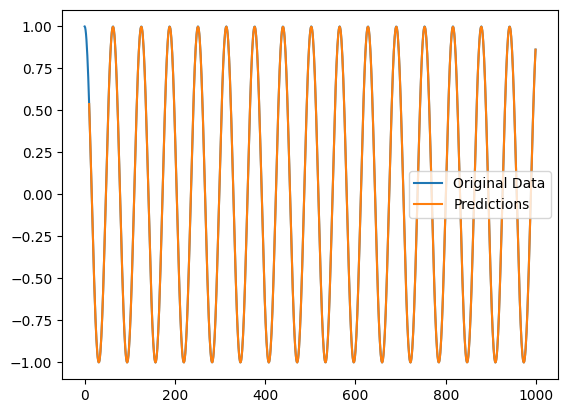

In [45]:
import matplotlib.pyplot as plt

plt.plot(df['value'].values, label='Original Data')
plt.plot(range(seq_length, len(predictions) + seq_length), predictions, label='Predictions')
plt.legend()
plt.show()